# Insight apa yang akan kita cari?
### - Seberapa efektif test preparation course?
### - Apa faktor yang paling berpengaruh terhadap nilai siswa?
### - Apa cara terbaik untuk menaikkan nilai siswa?

In [1]:
# Import library yang dibutuhkan

import pandas as pd
import pandas_profiling as pp
import plotly.express as px
import numpy as np
import seaborn as sns
import statistics as sts
import sys
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import nltk
from nltk.corpus import stopwords
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
# Fungsi untuk menampilkan detail angka di atas bar

def show_values(axs, orient = 'v', space=.1):
    def _single(ax):
        if orient == 'v':
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height() * 0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha = 'center') 
        elif orient == 'h':
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height() * 0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha = 'left')

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

In [3]:
# Membaca data dari exams.csv

df = pd.read_csv("exams.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68
...,...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,73,70,65
996,male,group D,associate's degree,free/reduced,completed,85,91,92
997,female,group C,some high school,free/reduced,none,32,35,41
998,female,group C,some college,standard,none,73,74,82


In [4]:
# Mengecek jumlah data yang NaN

df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

##### Ternyata tidak ada yang NaN. Nice :)

In [5]:
# Rename kolom agar seragam

df = df.rename(columns = {'race/ethnicity':'race_ethinicity', 'parental level of education':'parental_education', 'test preparation course':'test_preparation_course', 'math score':'math_score', 'reading score':'reading_score', 'writing score':'writing_score'})
df.head()

,gender,race_ethinicity,parental_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [6]:
# Mengecek apakah nilainya sudah wajar semua angkanya

df.describe()

,math_score,reading_score,writing_score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


##### Tampak bahwa nilainya wajar

In [7]:
# Mengecek ukuran data
df.shape

(1000, 8)

In [8]:
# Mengecek tipe datanya
df.dtypes

gender                     object
race_ethinicity            object
parental_education         object
lunch                      object
test_preparation_course    object
math_score                  int64
reading_score               int64
writing_score               int64
dtype: object

In [9]:
# Membuat kolom mean_score yang merupakan rata-rata dari nilai math, reading, dan writing

df['mean_score'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis = 1)
df['mean_score']

0      65.666667
1      51.333333
2      56.333333
3      74.333333
4      73.000000
         ...    
995    69.333333
996    89.333333
997    36.000000
998    76.333333
999    62.333333
Name: mean_score, Length: 1000, dtype: float64

In [10]:
df.head()

,gender,race_ethinicity,parental_education,lunch,test_preparation_course,math_score,reading_score,writing_score,mean_score
0,male,group A,high school,standard,completed,67,67,63,65.666667
1,female,group D,some high school,free/reduced,none,40,59,55,51.333333
2,male,group E,some college,free/reduced,none,59,60,50,56.333333
3,male,group B,high school,standard,none,77,78,68,74.333333
4,male,group E,associate's degree,standard,completed,78,73,68,73.000000


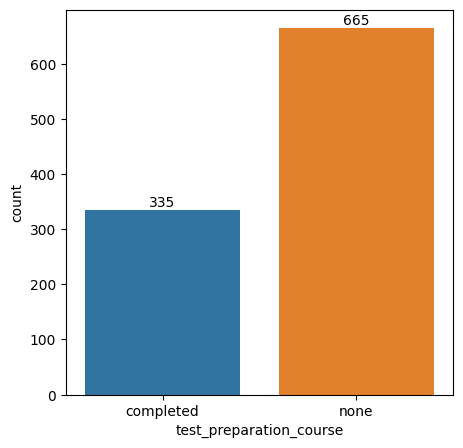

In [11]:
# Mengecek jumlah siswa yang menyelesaikan dan belum menyelesaikan / tidak mengikuti test preparation course 
plt.figure(figsize = (5,5))
ax = sns.countplot(data = df, x = 'test_preparation_course')

# Untuk menampilkan nilai detail di atas bar
for i in ax.containers:
    ax.bar_label(i,)

#### Tampak bahwa lebih sedikit yang menyelesaikan test preparation course

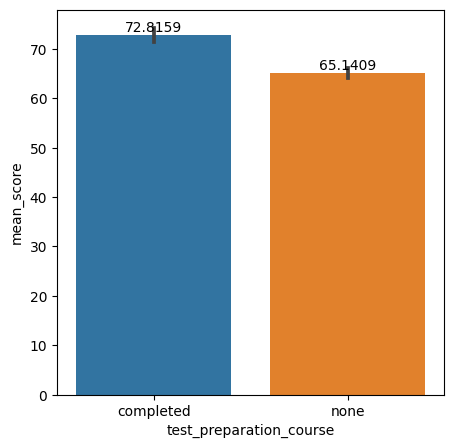

In [12]:
# Mengecek pengaruh test preparation course terhadap mean score
plt.figure(figsize = (5,5))
ax = sns.barplot(data = df, x = 'test_preparation_course', y = 'mean_score')

# Untuk menampilkan nilai detail di atas bar
for i in ax.containers:
    ax.bar_label(i,)

#### Tampak bahwa rata-rata nilai siswa yang menyelesaikan test preparation course lebih tinggi daripada yang tidak menyelesaikan / tidak mengikuti test preparation course

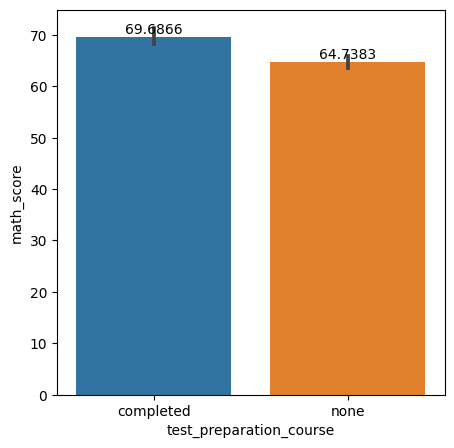

In [13]:
# Mengecek pengaruh test preparation course terhadap math score
plt.figure(figsize = (5,5))
ax = sns.barplot(data = df, x = 'test_preparation_course', y = 'math_score')

# Untuk menampilkan nilai detail di atas bar
for i in ax.containers:
    ax.bar_label(i,)

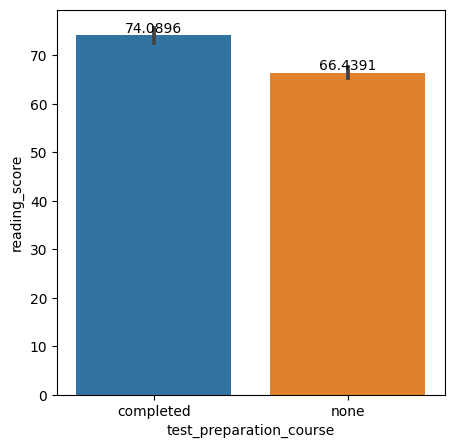

In [14]:
# Mengecek pengaruh test preparation course terhadap reading score
plt.figure(figsize = (5,5))
ax = sns.barplot(data = df, x = 'test_preparation_course', y = 'reading_score')

# Untuk menampilkan nilai detail di atas bar
for i in ax.containers:
    ax.bar_label(i,)

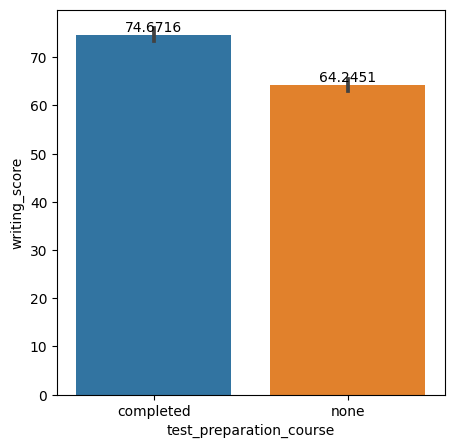

In [15]:
# Mengecek pengaruh test preparation course terhadap writing score
plt.figure(figsize = (5,5))
ax = sns.barplot(data = df, x = 'test_preparation_course', y = 'writing_score')

# Untuk menampilkan nilai detail di atas bar
for i in ax.containers:
    ax.bar_label(i,)

### Tampak bahwa rata - rata nilai dari siswa yang menyelesaikan test preparation course lebih tinggi daripada rata - rata nilai siswa yang tidak mengikuti test preparation course

In [16]:
# Mencari persentase siswa yang mendapatkan rata-rata nilai di atas 90 berdasarkan selesai atau tidaknya test preparation course 

df[df['mean_score']>90].test_preparation_course.value_counts(normalize=True)

completed    0.618182
none         0.381818
Name: test_preparation_course, dtype: float64

# Insight yang kita dapat:
### - Tampak bahwa test preparation course berpengaruh positif terhadap nilai rata-rata math, reading, dan writing. 
### - Tampak bahwa rata-rata nilai di atas 90 didominasi oleh siswa yang menyelesaikan test preparation course, yaitu sebanyak 61,8%
## Jadi, terbukti bahwa test preparation course EFEKTIF membuat nilai siswa lebih tinggi

In [17]:
# Mengecek rata-rata nilai siswa berdasarkan gender
df.groupby(["gender"])["mean_score"].mean()

gender
female    68.930987
male      66.573179
Name: mean_score, dtype: float64

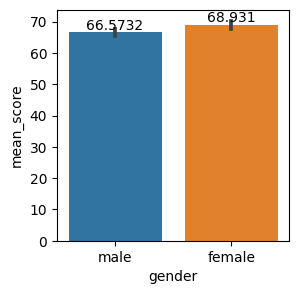

In [18]:
# Mengecek pengaruh gender terhadap mean score
plt.figure(figsize = (3,3))
ax = sns.barplot(data = df, x = 'gender', y = 'mean_score')

# Untuk menampilkan nilai detail di atas bar
for i in ax.containers:
    ax.bar_label(i,)

In [19]:
# Kita membuat DataFrame baru untuk meng-group mean score berdasarkan gender
# Tujuan: Kita ingin melihat seberapa pengaruh gender terhadap mean score

df_score_by_gender = df.groupby(["gender"])["mean_score"].mean()
df_score_by_gender = df_score_by_gender.to_frame()
df_score_by_gender

,mean_score
gender,
female,68.930987
male,66.573179


In [20]:
# Menambahkan kolom diff_gender untuk menampilkan selisih nilai antar gender terhadap mean score
df_score_by_gender['diff_gender'] = df_score_by_gender['mean_score'].diff()
df_score_by_gender

,mean_score,diff_gender
gender,,
female,68.930987,NaN
male,66.573179,-2.357808


In [21]:
# Menampilkan selisih antara mean score terbesar dan terkecil berdasarkan gender
maksimal = df_score_by_gender['mean_score'].max()
minimal = df_score_by_gender['mean_score'].min()
range_by_gender = maksimal - minimal
range_by_gender

2.3578082930534237

### Tampak hanya ada sedikit perbedaan antara mean score male dan female
### Artinya, gender tidak terlalu berpengaruh terhadap mean score siswa

In [22]:
# Mengecek rata-rata nilai siswa berdasarkan race ethnicity
df.groupby(["race_ethinicity"])["mean_score"].mean()

race_ethinicity
group A    66.915612
group B    65.336585
group C    64.679051
group D    71.204835
group E    72.402036
Name: mean_score, dtype: float64

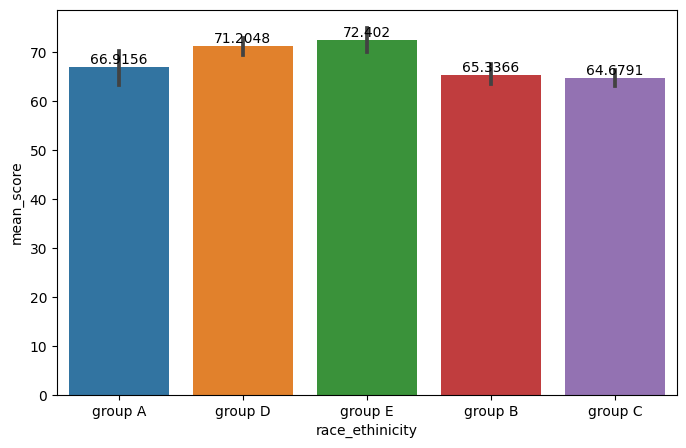

In [23]:
# Mengecek pengaruh race ethnicity terhadap mean score
plt.figure(figsize = (8,5))
ax = sns.barplot(data = df, x = 'race_ethinicity', y = 'mean_score')

# Untuk menampilkan nilai detail di atas bar
for i in ax.containers:
    ax.bar_label(i,)

In [24]:
# Kita membuat DataFrame baru untuk meng-group mean score berdasarkan race/ethnicity
# Tujuan: Kita ingin melihat seberapa pengaruh race (ras) terhadap mean score
df_score_by_race = df.groupby(["race_ethinicity"])["mean_score"].mean()
df_score_by_race = df_score_by_race.to_frame()
df_score_by_race

,mean_score
race_ethinicity,
group A,66.915612
group B,65.336585
group C,64.679051
group D,71.204835
group E,72.402036


In [25]:
# Menammbahkan kolom diff_race untuk menampilkan selisih nilai antar ras terhadap mean score
df_score_by_race['diff_race'] = df_score_by_race['mean_score'].diff()
df_score_by_race

,mean_score,diff_race
race_ethinicity,,
group A,66.915612,NaN
group B,65.336585,-1.579026
group C,64.679051,-0.657535
group D,71.204835,6.525784
group E,72.402036,1.197201


In [26]:
# Menampilkan selisih antara mean score terbesar dan terkecil berdasarkan ras
maksimal = df_score_by_race['mean_score'].max()
minimal = df_score_by_race['mean_score'].min()
range_by_race = maksimal - minimal
range_by_race

7.722985055814206

#### Tampak bahwa jarak rata-rata nilai tertinggi dan terendah berdasarkan ras = 7.72

In [27]:
# Mengecek rata-rata nilai siswa berdasarkan parental education
df.groupby(["parental_education"])["mean_score"].mean()

parental_education
associate's degree    70.211823
bachelor's degree     73.303571
high school           65.818482
master's degree       74.300000
some college          66.692192
some high school      62.549738
Name: mean_score, dtype: float64

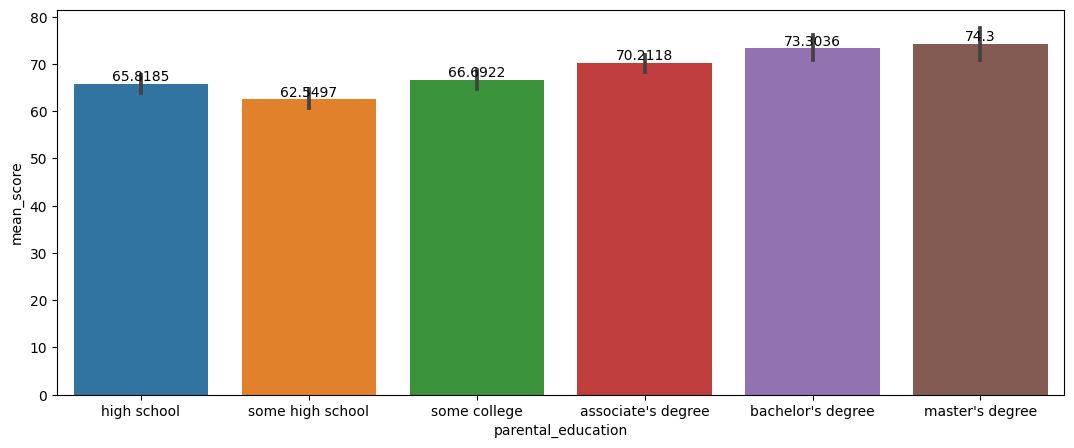

In [28]:
# Mengecek pengaruh parental education terhadap mean score
plt.figure(figsize = (13,5))
ax = sns.barplot(data = df, x = 'parental_education', y = 'mean_score')

# Untuk menampilkan nilai detail di atas bar
for i in ax.containers:
    ax.bar_label(i,)

In [29]:
df_mean_by_education = df.groupby(["parental_education"])["mean_score"].mean()
df_mean_by_education = df_mean_by_education.to_frame()
df_mean_by_education

,mean_score
parental_education,
associate's degree,70.211823
bachelor's degree,73.303571
high school,65.818482
master's degree,74.300000
some college,66.692192
some high school,62.549738


In [34]:
df_mean_by_education[df_mean_by_education['mean_score'] == df_mean_by_education['mean_score'].max()]

,mean_score
parental_education,
master's degree,74.3


In [31]:
# Cara lain:
#df_mean_by_education.idxmax()

mean_score    master's degree
dtype: object

#### Tampak bahwa siswa yang pendidikan orang tuanya master, meraih rata-rata nilai yang lebih tinggi

In [56]:
df_mean_by_education['diff_education'] = df_mean_by_education['mean_score'].diff()
df_mean_by_education

,mean_score,diff_education
parental_education,,
associate's degree,70.211823,NaN
bachelor's degree,73.303571,3.091749
high school,65.818482,-7.485090
master's degree,74.300000,8.481518
some college,66.692192,-7.607808
some high school,62.549738,-4.142454


In [78]:
maksimal = df_mean_by_education['mean_score'].max()
minimal = df_mean_by_education['mean_score'].min()
range_by_education = maksimal - minimal
range_by_education

11.750261780104708

#### Tampak bahwa selisih rata-rata nilai tertinggi dan terendah berdasarkan tingkat pendidikan orang tua cukup tinggi
#### Artinya, faktor pendidikan orang tua cukup berpengaruh pada nilai siswa

In [23]:
# Mengecek rata-rata nilai siswa berdasarkan konsumsi makan siang
df.groupby(["lunch"])["mean_score"].mean()

lunch
free/reduced    60.873563
standard        71.361963
Name: mean_score, dtype: float64

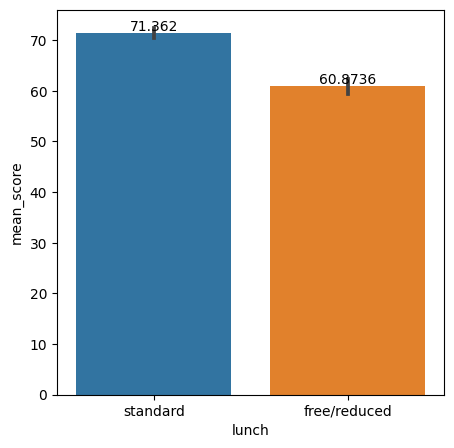

In [24]:
# Mengecek pengaruh konsumsi makan siang terhadap mean score
plt.figure(figsize = (5,5))
ax = sns.barplot(data = df, x = 'lunch', y = 'mean_score')

# Untuk menampilkan nilai detail di atas bar
for i in ax.containers:
    ax.bar_label(i,)

In [74]:
df_score_by_lunch = df.groupby(["lunch"])["mean_score"].mean()
df_score_by_lunch = df_score_by_lunch.to_frame()
df_score_by_lunch

,mean_score
lunch,
free/reduced,60.873563
standard,71.361963


In [75]:
df_score_by_lunch['diff_lunch'] = df_score_by_lunch['mean_score'].diff()
df_score_by_lunch

,mean_score,diff_lunch
lunch,,
free/reduced,60.873563,NaN
standard,71.361963,10.4884


In [79]:
maksimal = df_score_by_lunch['mean_score'].max()
minimal = df_score_by_lunch['mean_score'].min()
range_by_lunch = maksimal - minimal
range_by_lunch

10.488399971793235

#### Tampak bahwa selisih antara rata-rata nilai tertinggi dan terendah berdasarkan jenis makan siang yang dikonsumsi juga cukup tinggi
#### Artinya, faktor jenis makan siang yang dikonsumsi juga berpengaruh cukup besar pada nilai siswa

In [54]:
#df_mean_by_lunch.set_index('mean_score').diff()

,diff_lunch
mean_score,
60.873563,NaN
71.361963,NaN


In [29]:
# Mengecek rata-rata nilai siswa berdasarkan konsumsi makan siang
df.groupby(["test_preparation_course"])["mean_score"].mean()

test_preparation_course
completed    72.815920
none         65.140852
Name: mean_score, dtype: float64

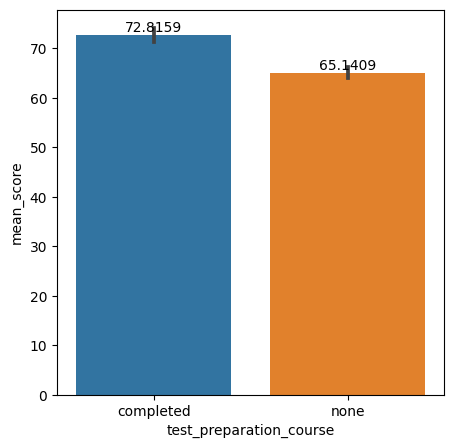

In [30]:
# Mengecek pengaruh test preparation course terhadap mean score
plt.figure(figsize = (5,5))
ax = sns.barplot(data = df, x = 'test_preparation_course', y = 'mean_score')

# Untuk menampilkan nilai detail di atas bar
for i in ax.containers:
    ax.bar_label(i,)

In [97]:
df_score_by_course = df.groupby(["test_preparation_course"])["mean_score"].mean()
df_score_by_course = df_score_by_course.to_frame()
df_score_by_course

,mean_score
test_preparation_course,
completed,72.815920
none,65.140852


In [98]:
df_score_by_course['diff_course'] = df_score_by_course['mean_score'].diff()
df_score_by_course

,mean_score,diff_course
test_preparation_course,,
completed,72.815920,NaN
none,65.140852,-7.675068


In [99]:
maksimal = df_score_by_course['mean_score'].max()
minimal = df_score_by_course['mean_score'].min()
range_by_course = maksimal - minimal
range_by_course

7.675068267684139

#### Tampak bahwa selisih rata-rata nilai tertinggi dan terendah berdasarkan preparation course ada di antara faktor faktor yang lain (tidak terlalu besar dan tidak terlalu kecil)

In [100]:
range_all = {'by':['gender', 'parental_education', 'race', 'lunch', 'test_preparation_course'], 'range_score':[range_by_gender, range_by_education, range_by_race, range_by_lunch, range_by_course]}
df_range = pd.DataFrame(range_all).set_index(['by'])
df_range

,range_score
by,
gender,2.357808
parental_education,11.750262
race,7.722985
lunch,10.488400
test_preparation_course,7.675068


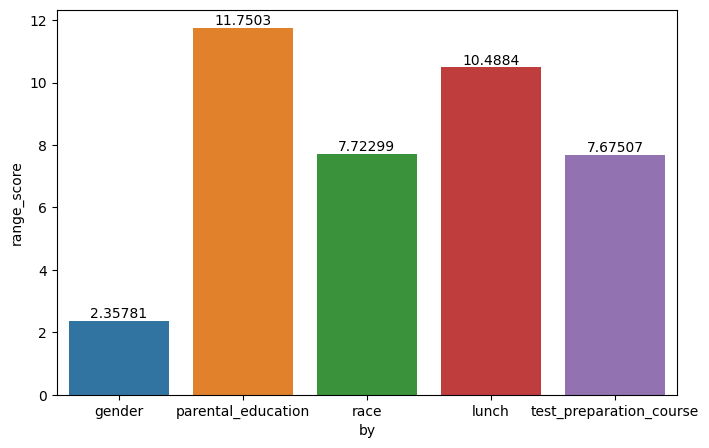

In [101]:
# Mengecek faktor apa yang paling berpengaruh terhadap score
plt.figure(figsize = (8,5))
ax = sns.barplot(data = df_range, x = df_range.index, y = 'range_score')

# Untuk menampilkan nilai detail di atas bar
for i in ax.containers:
    ax.bar_label(i,)

# Insight yang bisa kita dapat:
### - Dari bar plot tersebut, tampak bahwa faktor yang berpengaruh besar terhadap nilai siswa adalah tingkat pendidikan orang tua dan jenis makan siang yang dikonsumi siswa
### - Di sisi lain, faktor yang pengaruhnya paling kecil terhadap nilai siswa adalah gender

# Menjawab pertanyaan awal:
## 1. Test preparation course berpengaruh POSITIF terhadap nilai math, reading, dan writing.
## 2. Faktor yang paling berpengaruh terhadap nilai siswa adalah tingkat pendidikan orang tua dan jenis makanan yang dikonsumsi siswa.

# Bonus: Latihan Visualisasi 

In [31]:
# Jumlah masing-masing siswa male dan female
male_female = df.groupby('gender').agg({'gender':'count'}).rename(columns = {'gender':'count'}).reset_index()
male_female

,gender,count
0,female,483
1,male,517


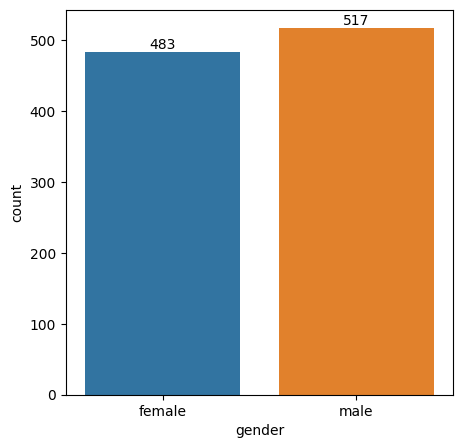

In [32]:
#Visualisasi jumlah siswa male dan female
plt.figure(figsize = (5,5))
ax = sns.barplot(data = male_female, x = 'gender', y = 'count')
# Untuk menampilkan nilai detail di atas bar
for i in ax.containers:
    ax.bar_label(i,)

In [33]:
# Menampilkan semua jenis parental education di data ini
df['parental_education'].unique()

array(['high school', 'some high school', 'some college',
       "associate's degree", "bachelor's degree", "master's degree"],
      dtype=object)

In [34]:
prep = df[['test_preparation_course', 'mean_score']]
prep

,test_preparation_course,mean_score
0,completed,65.666667
1,none,51.333333
2,none,56.333333
3,none,74.333333
4,completed,73.000000
...,...,...
995,none,69.333333
996,completed,89.333333
997,none,36.000000
998,none,76.333333


In [35]:
# DataFrame parental education vs mean score
parent_edu = df[['parental_education', 'mean_score']]
parent_edu

,parental_education,mean_score
0,high school,65.666667
1,some high school,51.333333
2,some college,56.333333
3,high school,74.333333
4,associate's degree,73.000000
...,...,...
995,high school,69.333333
996,associate's degree,89.333333
997,some high school,36.000000
998,some college,76.333333


In [36]:
# DataFrame lunch vs mean score
lunch = df[['lunch', 'mean_score']]
lunch

,lunch,mean_score
0,standard,65.666667
1,free/reduced,51.333333
2,free/reduced,56.333333
3,standard,74.333333
4,standard,73.000000
...,...,...
995,standard,69.333333
996,free/reduced,89.333333
997,free/reduced,36.000000
998,standard,76.333333


In [37]:
# Jumlah setiap race ethnicity group
race = df.groupby('race_ethinicity').agg({'race_ethinicity':'count'}).rename(columns = {'race_ethinicity':'count'}).sort_values(by = 'count', ascending = False).reset_index()
race

,race_ethinicity,count
0,group C,323
1,group D,262
2,group B,205
3,group E,131
4,group A,79


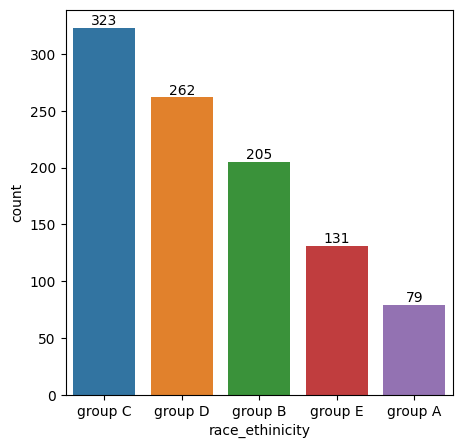

In [38]:
# Visualisasi jumlah setiap race ethnicity group
plt.figure(figsize = (5,5))
ax = sns.barplot(data = race, x = 'race_ethinicity', y = 'count')
# Untuk menampilkan nilai detail di atas bar
for i in ax.containers:
    ax.bar_label(i,)

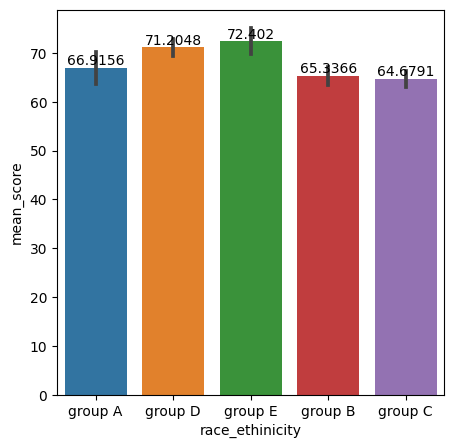

In [39]:
# Visualisasi rata-rata nilai siswa berdasarkan race / ethnicity
plt.figure(figsize = (5,5))
ax = sns.barplot(data = df, x = 'race_ethinicity', y = 'mean_score')
# Untuk menampilkan nilai detail di atas bar
for i in ax.containers:
    ax.bar_label(i,)

### Tampak rata-rata nilai yang lebih tinggi didapatkan oleh group E dan yang paling rendah dimiliki oleh group C

In [40]:
# Meng-group mean score berdasarkan race/ethnicity
df.groupby(["race_ethinicity"])["mean_score"].mean()

race_ethinicity
group A    66.915612
group B    65.336585
group C    64.679051
group D    71.204835
group E    72.402036
Name: mean_score, dtype: float64

In [41]:
labels = df['race_ethinicity'].value_counts().index
labels

Index(['group C', 'group D', 'group B', 'group E', 'group A'], dtype='object')

In [42]:
# Cara 1
sizes = df['race_ethinicity'].value_counts()
sizes

group C    323
group D    262
group B    205
group E    131
group A     79
Name: race_ethinicity, dtype: int64

In [43]:
# Cara 2
race = df.groupby('race_ethinicity').agg({'race_ethinicity':'count'}).rename(columns = {'race_ethinicity':'count'}).sort_values(by = 'count', ascending = False).reset_index()
race

,race_ethinicity,count
0,group C,323
1,group D,262
2,group B,205
3,group E,131
4,group A,79


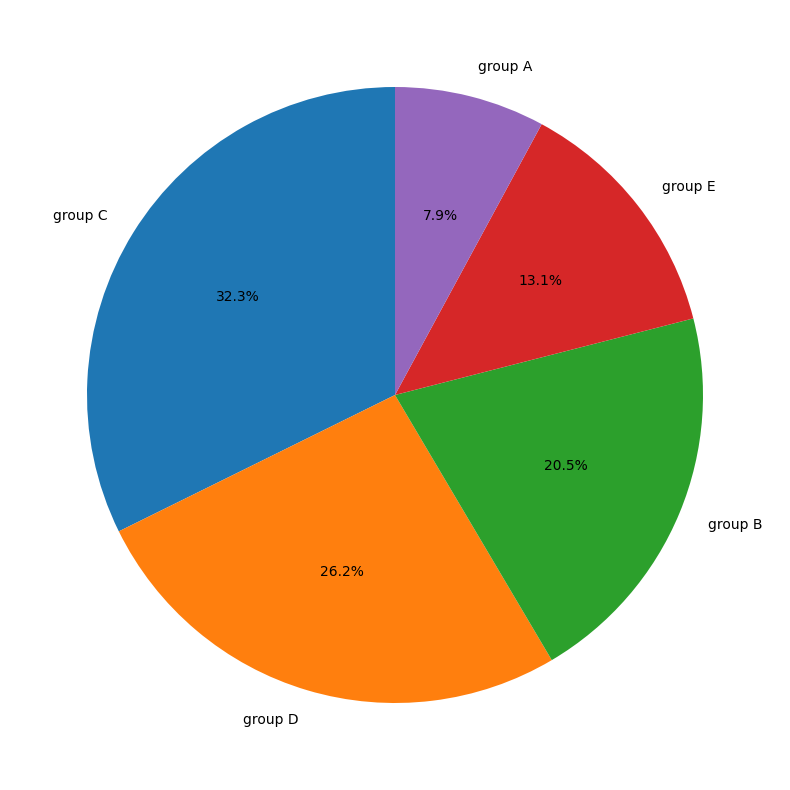

In [44]:
# Latihan visualisasi pie
fig1, ax1 = plt.subplots()
# autpct buat nampilin detail persennya
ax1.pie(sizes, labels = labels, autopct='%1.1f%%', startangle = 90)
# ax1.axis('equal')
plt.show()

In [45]:
gen = df[['gender', 'mean_score']]
gen

,gender,mean_score
0,male,65.666667
1,female,51.333333
2,male,56.333333
3,male,74.333333
4,male,73.000000
...,...,...
995,male,69.333333
996,male,89.333333
997,female,36.000000
998,female,76.333333


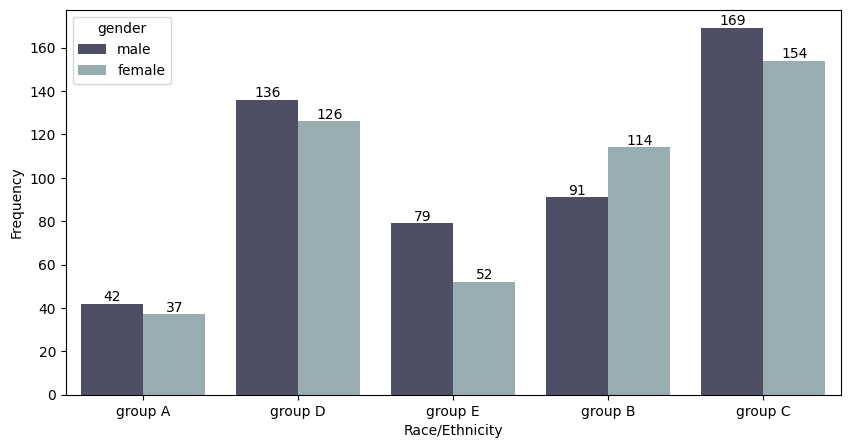

In [46]:
# Latihan visualisasi countplot
plt.figure(figsize = (10,5))
ax = sns.countplot(x = df['race_ethinicity'], hue = df['gender'], palette = 'bone')
plt.xlabel("Race/Ethnicity")
plt.ylabel("Frequency")
# Untuk menampilkan nilai detail di atas bar
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

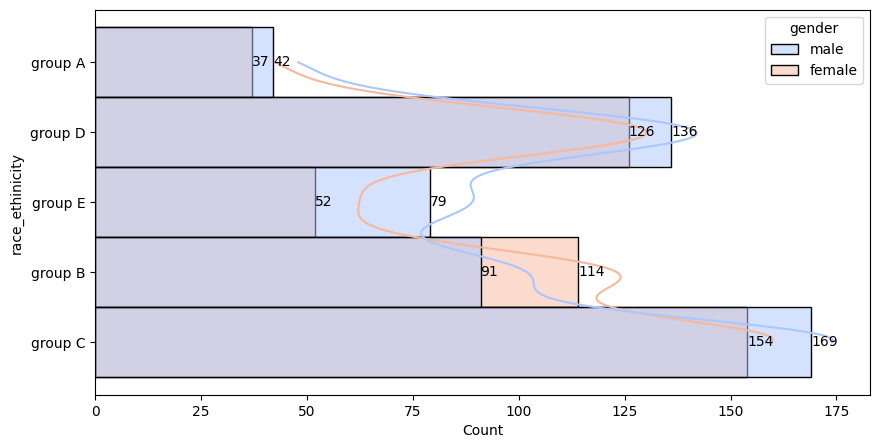

In [47]:
# Latihan visualisasi histplot with kde and hue
plt.figure(figsize = (10,5))
ax = sns.histplot(data=df, y="race_ethinicity", hue= "gender", palette="coolwarm", kde= True)
# Untuk menampilkan nilai detail di atas bar
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

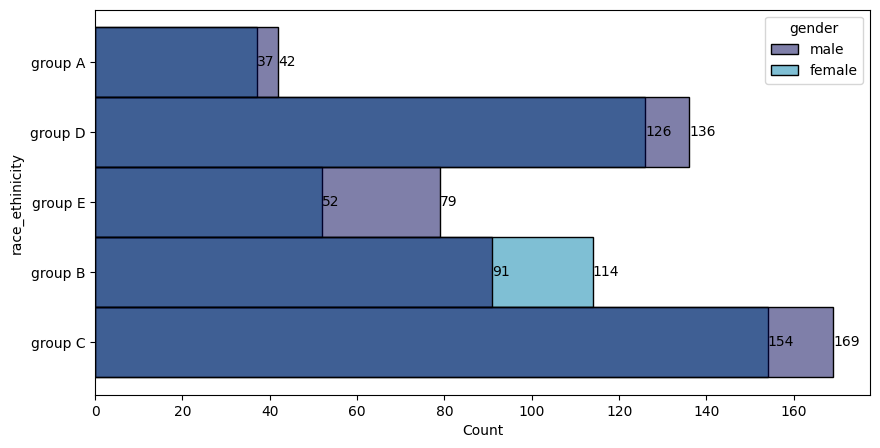

In [48]:
# Latihan visualisasi histplot without kde
plt.figure(figsize = (10,5))
ax = sns.histplot(data=df, y="race_ethinicity", hue= "gender", palette="ocean")
# Untuk menampilkan nilai detail di atas bar
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

In [49]:
# Mengecek jumlah male berdasarkan race/ethnicitynya
df[df['gender']=='male'].race_ethinicity.value_counts()

group C    169
group D    136
group B     91
group E     79
group A     42
Name: race_ethinicity, dtype: int64

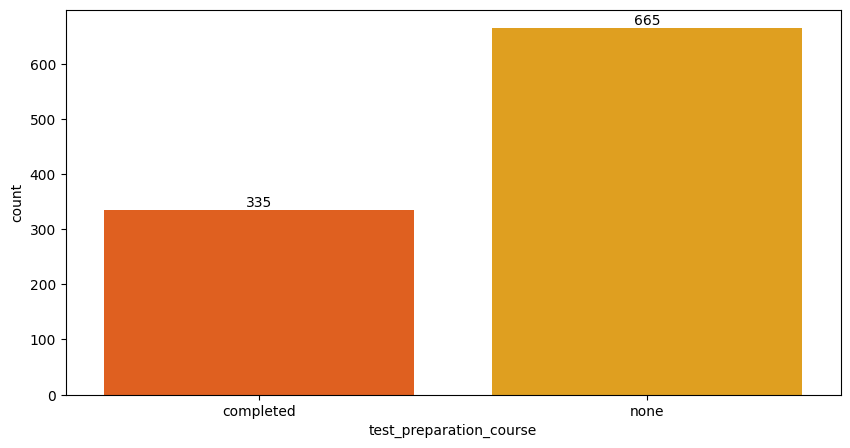

In [50]:
# Latihan countplot
plt.figure(figsize = (10,5))
ax = sns.countplot(data=df, x="test_preparation_course",palette="autumn")
# Untuk menampilkan nilai detail di atas bar
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

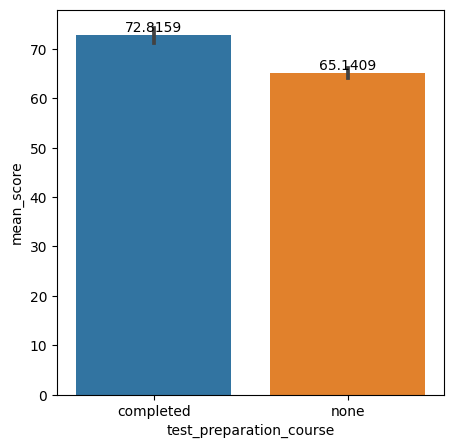

In [51]:
plt.figure(figsize = (5,5))
ax = sns.barplot(data = df, x = 'test_preparation_course', y = 'mean_score')
# Untuk menampilkan nilai detail di atas bar
for i in ax.containers:
    ax.bar_label(i,)